# Restaurant Industry Consulting Firm
July 15, 2019<br>
Ngoc, Inferential Statistics<br>
Welch’s T-Tests and T-Tests for Cuisine in the DMV Area

-----------------

In this notebook, we want to:
- Find the 2 most popular cuisines in each DMV area
- Apply Welch’s t-tests and t-tests to figure out the more popular cuisine
- Apply Welch’s t-tests and t-tests to figure out the higher rating cuisine

-------------------

## Import Needed Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import helper_functions
import matplotlib.pyplot as plt

from scipy import stats

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

## Load Needed Data

In [2]:
dc = pd.read_csv("data/dc_restaurants_cuisine.csv")
va = pd.read_csv("data/va_restaurants_cuisine.csv")
md = pd.read_csv("data/md_restaurants_cuisine.csv")

## Inferential Statistics

Use $\alpha = 0.05$ throughout this notebook.

Get helper functions:

In [3]:
hf = helper_functions.InferentialStatisticsHelperFunctions()

-----------------------
## - cuisine

### DC

**Find the 2 most popular cuisines:**

What are the 2 most popular cuisines in DC, based on the "standardized" number of reviews? Note: We use review_count to imply popularity.

In [4]:
hf.top_two_cuisines(dc, "review_count")

Index(['Ramen', 'Spanish'], dtype='object', name='cuisine')


----------------------
Our candidates are Ramen and Spanish. We want to know if there are statistical differences between these two.<br><br>
H0: $\mu_{Ramen} = \mu_{Spanish}$<br>
H1: $\mu_{Ramen} \neq \mu_{Spanish}$

---------------------------

The first cuisine:

In [5]:
dc_first_review_count, dc_first_rating = hf.get_cuisine(dc, "Ramen")

The second cuisine:

In [6]:
dc_second_review_count, dc_second_rating = hf.get_cuisine(dc, "Spanish")

**Check if the distributions of the two groups follow the normal distribution:**

H0: the data was drawn from a normal distribution<br>
H1: the data was not drawn from a normal distribution

*review_count*

In [7]:
stats.shapiro(dc_first_review_count)

(0.7741931080818176, 0.00027142345788888633)

In [8]:
stats.shapiro(dc_second_review_count)

(0.7949022054672241, 0.0007259448757395148)

*rating*

In [9]:
stats.shapiro(dc_first_rating)

(0.7383054494857788, 8.602852176409215e-05)

In [10]:
stats.shapiro(dc_second_rating)

(0.9042730331420898, 0.0496271476149559)

Rejecting the null hypotheses leads to normality assumption being violated.

**Have to bootstrap:**

In [11]:
np.random.seed(546435)
dc_first_review_count_bs = hf.sampling(dc_first_review_count, 100000, 1000)
dc_second_review_count_bs = hf.sampling(dc_second_review_count, 100000, 1000)
dc_first_rating_bs = hf.sampling(dc_first_rating, 100000, 1000)
dc_second_rating_bs = hf.sampling(dc_second_rating, 100000, 1000)

**Check for normality again:**

*review_count*

In [12]:
stats.shapiro(dc_first_review_count_bs)

(0.9978909492492676, 0.23992568254470825)

In [13]:
stats.shapiro(dc_second_review_count_bs)

(0.9980205297470093, 0.29132407903671265)

*rating*

In [14]:
stats.shapiro(dc_first_rating_bs)

(0.9978526830673218, 0.22631195187568665)

In [15]:
stats.shapiro(dc_second_rating_bs)

(0.9973392486572266, 0.0999244898557663)

Fail to reject the null hypotheses. Good!

**Check if the two groups are from populations with equal variances:**

*review_count*

In [16]:
stats.levene(dc_first_review_count_bs, dc_second_review_count_bs)

LeveneResult(statistic=13.93471430305082, pvalue=0.0001945633357491114)

Rejecting the null hypothesis leads to variance assumption being violated.

*rating*

In [17]:
stats.levene(dc_first_rating_bs, dc_second_rating_bs)

LeveneResult(statistic=1.989322751018498, pvalue=0.15856737164793835)

Fail to reject the null hypothesis. Good!

**Desired Inferential Statistics:**

Welch’s t-test:<br>
We want: Ramen's popularity is not the same as Spanish's popularity.

In [18]:
stats.ttest_ind(dc_first_review_count_bs, dc_second_review_count_bs, equal_var=False)

Ttest_indResult(statistic=597.529963772672, pvalue=0.0)

Reject the null hypothesis. t-statistic is positive.<br>
Ramen wins!

t-test:<br>
We want: Ramen's rating is not the same as Spanish's rating.

In [19]:
stats.ttest_ind(dc_first_rating_bs, dc_second_rating_bs)

Ttest_indResult(statistic=807.1305078288788, pvalue=0.0)

Reject the null hypothesis. t-statistic is positive.<br>
Ramen wins!

**Plot the Two Groups:**

*review_count*

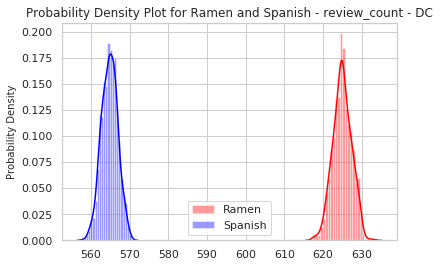

In [20]:
hf.plot_distribution(dc_first_review_count_bs, dc_second_review_count_bs, ["Ramen", "Spanish"], "review_count - DC")

*rating*

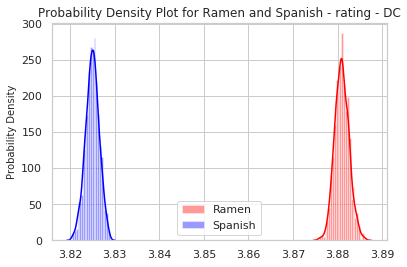

In [21]:
hf.plot_distribution(dc_first_rating_bs, dc_second_rating_bs, ["Ramen", "Spanish"], "rating - DC")

**Conclusion:** We'd want to open a Ramen restaurant in DC.

### VA

**Find the 2 most popular cuisines:**

What are the 2 most popular cuisines in VA, based on the "standardized" number of reviews? Note: We use review_count to imply popularity.

In [22]:
hf.top_two_cuisines(va, "review_count")

Index(['Bars', 'Seafood'], dtype='object', name='cuisine')


----------------------
Our candidates are Bars and Seafood. We want to know if there are statistical differences between these two.<br><br>
H0: $\mu_{Bars} = \mu_{Seafood}$<br>
H1: $\mu_{Bars} \neq \mu_{Seafood}$

---------------------------

The first cuisine:

In [23]:
va_first_review_count, va_first_rating = hf.get_cuisine(va, "Bars")

The second cuisine:

In [24]:
va_second_review_count, va_second_rating = hf.get_cuisine(va, "Seafood")

**Check if the distributions of the two groups follow the normal distribution:**

H0: the data was drawn from a normal distribution<br>
H1: the data was not drawn from a normal distribution

*review_count*

In [25]:
stats.shapiro(va_first_review_count)

(0.8068469166755676, 1.0536710393083126e-10)

In [26]:
stats.shapiro(va_second_review_count)

(0.8101442456245422, 3.754873745265286e-09)

*rating*

In [27]:
stats.shapiro(va_first_rating)

(0.9266953468322754, 1.3774934814136941e-05)

In [28]:
stats.shapiro(va_second_rating)

(0.8725098371505737, 4.7185949370032176e-07)

Rejecting the null hypotheses leads to normality assumption being violated.

**Have to bootstrap:**

In [29]:
np.random.seed(314874)
va_first_review_count_bs = hf.sampling(va_first_review_count, 100000, 1000)
va_second_review_count_bs = hf.sampling(va_second_review_count, 100000, 1000)
va_first_rating_bs = hf.sampling(va_first_rating, 100000, 1000)
va_second_rating_bs = hf.sampling(va_second_rating, 100000, 1000)

**Check for normality again:**

*review_count*

In [30]:
stats.shapiro(va_first_review_count_bs)

(0.998667299747467, 0.6664901971817017)

In [31]:
stats.shapiro(va_second_review_count_bs)

(0.998412013053894, 0.49850475788116455)

*rating*

In [32]:
stats.shapiro(va_first_rating_bs)

(0.9991390705108643, 0.9347654581069946)

In [33]:
stats.shapiro(va_second_rating_bs)

(0.999219536781311, 0.960389256477356)

Fail to reject the null hypotheses. Good!

**Check if the two groups are from populations with equal variances:**

*review_count*

In [34]:
stats.levene(va_first_review_count_bs, va_second_review_count_bs)

LeveneResult(statistic=0.14040278431161762, pvalue=0.7079206841429102)

*rating*

In [35]:
stats.levene(va_first_rating_bs, va_second_rating_bs)

LeveneResult(statistic=0.3347071435428664, pvalue=0.5629656153001051)

Fail to reject the null hypotheses. Good!

**Desired Inferential Statistics:**

t-test:<br>
We want: Bars' popularity is not the same as Seafood's popularity.

In [36]:
stats.ttest_ind(va_first_review_count_bs, va_second_review_count_bs)

Ttest_indResult(statistic=757.4645546550039, pvalue=0.0)

Reject the null hypothesis. t-statistic is positive.<br>
Bars wins!

t-test:<br>
We want: Bars' rating is not the same as Seafood's rating.

In [37]:
stats.ttest_ind(va_first_rating_bs, va_second_rating_bs)

Ttest_indResult(statistic=-774.3715293190149, pvalue=0.0)

Reject the null hypothesis. t-statistic is negative.<br>
Seafood wins!

**Plot the Two Groups:**

*review_count*

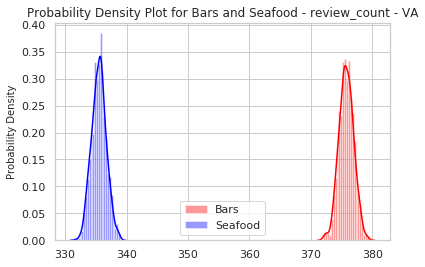

In [38]:
hf.plot_distribution(va_first_review_count_bs, va_second_review_count_bs, ["Bars", "Seafood"], "review_count - VA")

*rating*

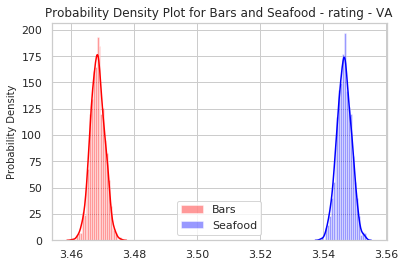

In [39]:
hf.plot_distribution(va_first_rating_bs, va_second_rating_bs, ["Bars", "Seafood"], "rating - VA")

**Conclusion:** Bars have more traffic but rating favors Seafood restaurants.

### MD

**Find the 2 most popular cuisines:**

What are the 2 most popular cuisines in MD, based on the "standardized" number of reviews? Note: We use review_count to imply popularity.

In [40]:
hf.top_two_cuisines(md, "review_count")

Index(['Bars', 'American (New)'], dtype='object', name='cuisine')


----------------------
Our candidates are Bars and American (New). We want to know if there are statistical differences between these two.<br><br>
H0: $\mu_{Bars} = \mu_{American (New)}$<br>
H1: $\mu_{Bars} \neq \mu_{American (New)}$

---------------------------

The first cuisine:

In [41]:
md_first_review_count, md_first_rating = hf.get_cuisine(md, "Bars")

The second cuisine:

In [42]:
md_second_review_count, md_second_rating = hf.get_cuisine(md, "American (New)")

**Check if the distributions of the two groups follow the normal distribution:**

H0: the data was drawn from a normal distribution<br>
H1: the data was not drawn from a normal distribution

*review_count*

In [43]:
stats.shapiro(md_first_review_count)

(0.6900336742401123, 1.3818322042169484e-09)

In [44]:
stats.shapiro(md_second_review_count)

(0.6912879943847656, 1.3027578148194774e-12)

*rating*

In [45]:
stats.shapiro(md_first_rating)

(0.9410432577133179, 0.008609042502939701)

In [46]:
stats.shapiro(md_second_rating)

(0.9171949028968811, 2.141371078323573e-05)

Rejecting the null hypotheses leads to normality assumption being violated.

**Have to bootstrap:**

In [47]:
np.random.seed(35457)
md_first_review_count_bs = hf.sampling(md_first_review_count, 100000, 1000)
md_second_review_count_bs = hf.sampling(md_second_review_count, 100000, 1000)
md_first_rating_bs = hf.sampling(md_first_rating, 100000, 1000)
md_second_rating_bs = hf.sampling(md_second_rating, 100000, 1000)

**Check for normality again:**

*review_count*

In [48]:
stats.shapiro(md_first_review_count_bs)

(0.9992197751998901, 0.9604592323303223)

In [49]:
stats.shapiro(md_second_review_count_bs)

(0.9986486434936523, 0.6538873314857483)

*rating*

In [50]:
stats.shapiro(md_first_rating_bs)

(0.9986286759376526, 0.6403818726539612)

In [51]:
stats.shapiro(md_second_rating_bs)

(0.9983735680580139, 0.4748717248439789)

Fail to reject the null hypotheses. Good!

**Check if the two groups are from populations with equal variances:**

*review_count*

In [52]:
stats.levene(md_first_review_count_bs, md_second_review_count_bs)

LeveneResult(statistic=3.1097143410194996, pvalue=0.07797943583985648)

Fail to reject the null hypothesis. Good!

*rating*

In [53]:
stats.levene(md_first_rating_bs, md_second_rating_bs)

LeveneResult(statistic=12.365938167164519, pvalue=0.0004469930215481184)

Rejecting the null hypothesis leads to variance assumption being violated.

**Desired Inferential Statistics:**

t-test:<br>
We want: Bars' popularity is not the same as American (New)'s popularity.

In [54]:
stats.ttest_ind(md_first_review_count_bs, md_second_review_count_bs)

Ttest_indResult(statistic=1011.6349050663866, pvalue=0.0)

Reject the null hypothesis. t-statistic is positive.<br>
Bars wins!

Welch’s t-test:<br>
We want: Bars' rating is not the same as American (New)'s rating.

In [55]:
stats.ttest_ind(md_first_rating_bs, md_second_rating_bs, equal_var=False)

Ttest_indResult(statistic=853.6946379107173, pvalue=0.0)

Reject the null hypothesis. t-statistic is positive.<br>
Bars wins!

**Plot the Two Groups:**

*review_count*

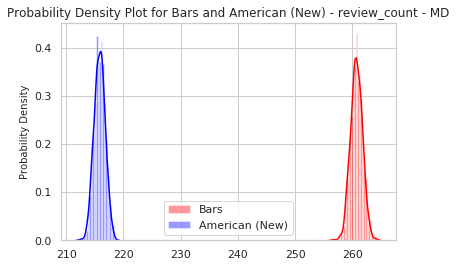

In [56]:
hf.plot_distribution(md_first_review_count_bs, md_second_review_count_bs, ["Bars", "American (New)"], "review_count - MD")

*rating*

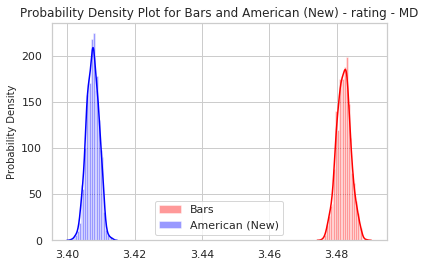

In [57]:
hf.plot_distribution(md_first_rating_bs, md_second_rating_bs, ["Bars", "American (New)"], "rating - MD")

**Conclusion:** We'd want to open a bar in MD.

---------------------------------
## - open_pass_midnight
We have decided to run a bar in MD. Should we open pass midnight or should we close early?

**Create 2 data sets:**

- bars in MD, open pass midnight
- bars in MD, closed before midnight

In [58]:
pass_midnight_review_count, pass_midnight_rating, not_pass_midnight_review_count, not_pass_midnight_rating = hf.get_bars_open_info(md)

**Check if the distributions of the two groups follow the normal distribution:**

H0: the data was drawn from a normal distribution<br>
H1: the data was not drawn from a normal distribution

*review_count*

In [59]:
stats.shapiro(pass_midnight_review_count)

(0.8629341125488281, 0.007154344115406275)

In [60]:
stats.shapiro(not_pass_midnight_review_count)

(0.6778969764709473, 1.7195308998907421e-07)

*rating*

In [61]:
stats.shapiro(pass_midnight_rating)

(0.9260075688362122, 0.11447566747665405)

In [62]:
stats.shapiro(not_pass_midnight_rating)

(0.8766323328018188, 0.0009863132145255804)

**Bootstrap:**

In [63]:
np.random.seed(45984531)
pass_midnight_review_count_bs = hf.sampling(pass_midnight_review_count, 100000, 1000)
not_pass_midnight_review_count_bs = hf.sampling(not_pass_midnight_review_count, 100000, 1000)
pass_midnight_rating_bs = hf.sampling(pass_midnight_rating, 100000, 1000)
not_pass_midnight_rating_bs = hf.sampling(not_pass_midnight_rating, 100000, 1000)

**Check for normality again:**

*review_count*

In [64]:
stats.shapiro(pass_midnight_review_count_bs)

(0.9987057447433472, 0.6924406290054321)

In [65]:
stats.shapiro(not_pass_midnight_review_count_bs)

(0.9987625479698181, 0.7303594946861267)

*rating*

In [66]:
stats.shapiro(pass_midnight_rating_bs)

(0.998740553855896, 0.715727686882019)

In [67]:
stats.shapiro(not_pass_midnight_rating_bs)

(0.9971408843994141, 0.07214023172855377)

Fail to reject the null hypotheses. Good!

**Check if the two groups are from populations with equal variances:**

*review_count*

In [68]:
stats.levene(pass_midnight_review_count_bs, not_pass_midnight_review_count_bs)

LeveneResult(statistic=289.8198016346828, pvalue=8.535837781318509e-61)

*rating*

In [69]:
stats.levene(pass_midnight_rating_bs, not_pass_midnight_rating_bs)

LeveneResult(statistic=60.093135959589276, pvalue=1.4298654424913025e-14)

Rejecting the null hypothesis leads to variance assumption being violated.

**Desired Inferential Statistics:**

Welch’s t-test:<br>
We want: pass_midnight's review_count is not the same as not_pass_midnight's review_count.

In [70]:
stats.ttest_ind(pass_midnight_review_count_bs, not_pass_midnight_review_count_bs, equal_var=False)

Ttest_indResult(statistic=-2383.4886945376957, pvalue=0.0)

Reject the null hypothesis. t-statistic is negative.<br>
not_pass_midnight wins!

Welch’s t-test:<br>
We want: pass_midnight's rating is not the same as not_pass_midnight's rating.

In [71]:
stats.ttest_ind(pass_midnight_rating_bs, not_pass_midnight_rating_bs, equal_var=False)

Ttest_indResult(statistic=-4237.331040257049, pvalue=0.0)

Reject the null hypothesis. t-statistic is negative.<br>
not_pass_midnight wins!

**Plot the Two Groups:**

*review_count*

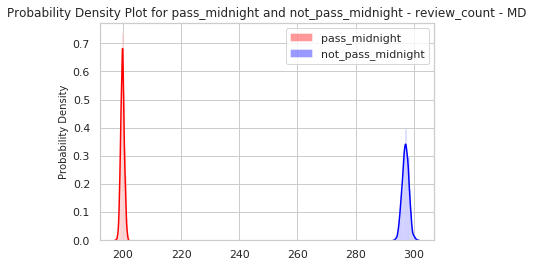

In [72]:
hf.plot_distribution(pass_midnight_review_count_bs, not_pass_midnight_review_count_bs, ["pass_midnight", "not_pass_midnight"], "review_count - MD")

*rating*

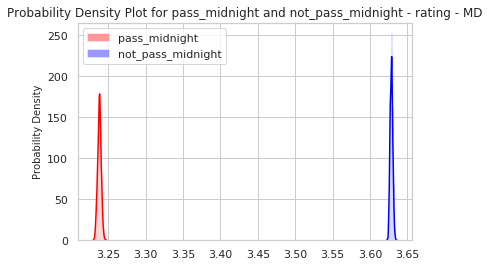

In [73]:
hf.plot_distribution(pass_midnight_rating_bs, not_pass_midnight_rating_bs, ["pass_midnight", "not_pass_midnight"], "rating - MD")

**Conclusion:** We'd want to close our bar in MD before midnight.